<a href="https://colab.research.google.com/github/acharjee19/Machine-learning-and-data-science/blob/master/Traffic_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [1]:
 #Run this cell and select the kaggle.json file downloaded from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juiacharya","key":"ea3f7b0d7a274433792b84ef816ca5d5"}'}

In [2]:
# The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset/traffic_sign_dataset


In [5]:
!kaggle datasets list -s gtsrb-german-traffic-sign
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          77169        932  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           9866        243  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            352          8  0.75             
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [6]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign  
%cd .. 

 99% 608M/612M [00:03<00:00, 172MB/s]
100% 612M/612M [00:03<00:00, 194MB/s]
/content/traffic_sign_dataset


In [7]:
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

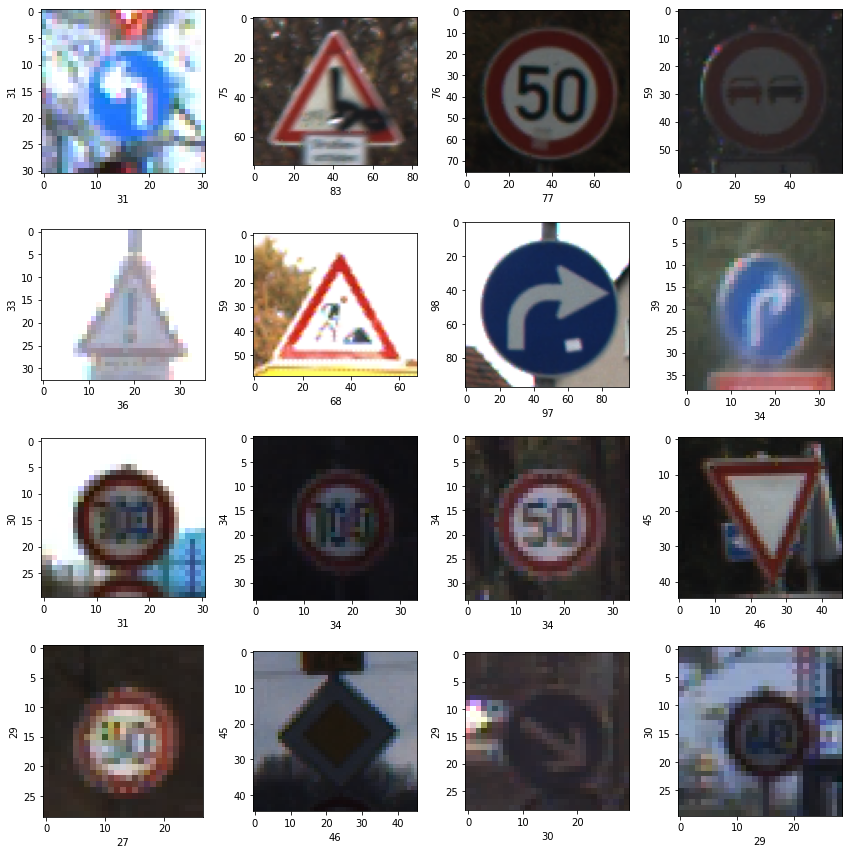

In [9]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [10]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [11]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [12]:
# Now we will reshape the images to (50,50)
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [13]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255 

In [14]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [21]:
images.shape

(39209, 50, 50, 3)

In [22]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [23]:
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [24]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [25]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [26]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 25, 25, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 11, 11, 64)       

In [27]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 167s - loss: 2.5094 - accuracy: 0.3158 - val_loss: 1.2214 - val_accuracy: 0.6705 - 167s/epoch - 680ms/step
Epoch 2/10
246/246 - 166s - loss: 1.1873 - accuracy: 0.6319 - val_loss: 0.5695 - val_accuracy: 0.8838 - 166s/epoch - 676ms/step
Epoch 3/10
246/246 - 166s - loss: 0.7919 - accuracy: 0.7455 - val_loss: 0.3527 - val_accuracy: 0.9419 - 166s/epoch - 675ms/step
Epoch 4/10
246/246 - 166s - loss: 0.6180 - accuracy: 0.8027 - val_loss: 0.2409 - val_accuracy: 0.9578 - 166s/epoch - 674ms/step
Epoch 5/10
246/246 - 164s - loss: 0.5239 - accuracy: 0.8304 - val_loss: 0.1675 - val_accuracy: 0.9728 - 164s/epoch - 665ms/step
Epoch 6/10
246/246 - 166s - loss: 0.4470 - accuracy: 0.8555 - val_loss: 0.1213 - val_accuracy: 0.9782 - 166s/epoch - 673ms/step
Epoch 7/10
246/246 - 165s - loss: 0.4033 - accuracy: 0.8692 - val_loss: 0.1213 - val_accuracy: 0.9830 - 165s/epoch - 672ms/step
Epoch 8/10
246/246 - 165s - loss: 0.3631 - accuracy: 0.8809 - val_loss: 0.0936 - val_accuracy: 0.9852 - 

<AxesSubplot:>

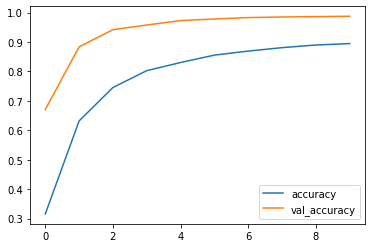

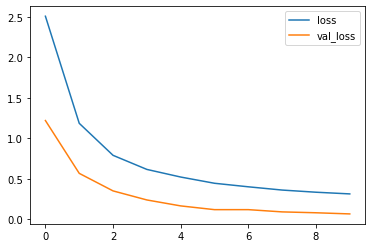

In [28]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [29]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [30]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [31]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [32]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [40]:
y_pred = model.predict_classes(test_images);
y_pred

AttributeError: ignored

In [39]:
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)


395/395 [==============================] - 16s 39ms/step


In [35]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

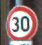

In [36]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

In [41]:
# Original label
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


In [47]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

TypeError: ignored

In [53]:
# Get the predicted class label for the first test image
y_pred_class = np.argmax(y_pred[0])

# Get the corresponding class label from the all_labels list
print("Predicted label : ",all_lables[y_pred[1]])

# Print the predicted label
print("Predicted label:", predicted_label)


TypeError: ignored

In [49]:
print(y_pred.shape)
print(y_pred.dtype)


(12630, 43)
float32


In [51]:
y_pred_labels = np.argmax(y_pred, axis=1)


In [59]:
predicted_labels = [all_lables[i] for i in y_pred_labels]
print("Predicted label: ", all_lables[int(y_pred[1])])


TypeError: ignored

In [60]:
print("Predicted label: ", predicted_labels[1])


Predicted label:  Speed limit (30km/h)


In [64]:
for i in range(len(y_pred_labels)):
    predicted_label = all_lables[y_pred_labels[i]]
    print("Predicted label:{}".format(i, predicted_label))


Streaming output truncated to the last 5000 lines.
Predicted label:7630
Predicted label:7631
Predicted label:7632
Predicted label:7633
Predicted label:7634
Predicted label:7635
Predicted label:7636
Predicted label:7637
Predicted label:7638
Predicted label:7639
Predicted label:7640
Predicted label:7641
Predicted label:7642
Predicted label:7643
Predicted label:7644
Predicted label:7645
Predicted label:7646
Predicted label:7647
Predicted label:7648
Predicted label:7649
Predicted label:7650
Predicted label:7651
Predicted label:7652
Predicted label:7653
Predicted label:7654
Predicted label:7655
Predicted label:7656
Predicted label:7657
Predicted label:7658
Predicted label:7659
Predicted label:7660
Predicted label:7661
Predicted label:7662
Predicted label:7663
Predicted label:7664
Predicted label:7665
Predicted label:7666
Predicted label:7667
Predicted label:7668
Predicted label:7669
Predicted label:7670
Predicted label:7671
Predicted label:7672
Predicted label:7673
Predicted label:7674
Pred